# Linear Regression

In [129]:
import pandas as pd
import numpy as np

weight_pd = pd.read_csv('weightV2.csv')
weight_pd.head()

,Weight,Waist
0,154.25,85.2
1,173.25,83.0
2,154.00,87.9
3,184.75,86.4
4,184.25,100.0


In [131]:
y = weight_pd.pop('Weight').values
X = weight_pd.values
X.shape

(251, 1)

The basic linear regression model is `sklearn` is `LinearRegression`.

In [134]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(' R squared statistic: {:.2f}'.format(reg.score(X, y)))
print(' Slope: {:.2f}'.format(reg.coef_[0]))
print(' Intercept: {:.2f}'.format(reg.intercept_))

 R squared statistic: 0.76
 Slope: 2.31
 Intercept: -35.45


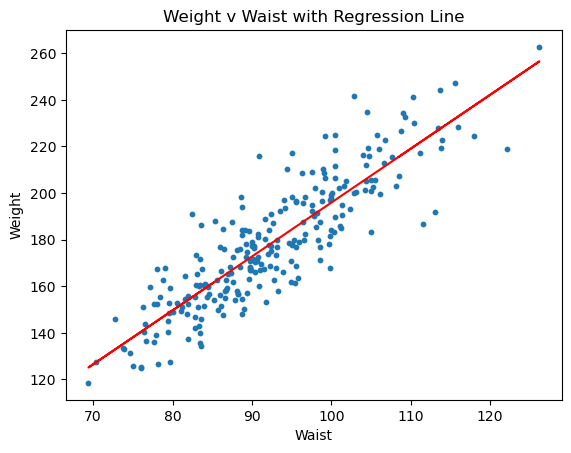

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
Y_pred = reg.predict(X)

plt.scatter(X, y, s = 10)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title ('Weight v Waist with Regression Line' )
plt.show()

## Multivariate Regression

In [139]:
bikes_df = pd.read_csv('bike_sharing.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [141]:
y = bikes_df.pop('count').values
bikes_df.pop('casual').values
bikes_df.pop('registered').values
bikes_df.pop('instant').values
bikes_df.pop('dteday').values

#X = bikes_df[['atemp']].values

X = bikes_df.values
X.shape

(731, 11)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(X)

reg = LinearRegression().fit(X_scal, y)
print(' R squared statistic: {:.3f}'.format(reg.score(X_scal, y)))
print(' Slope: {:.2f}'.format(reg.coef_[0]))
print(' Intercept: {:.2f}'.format(reg.intercept_))

 R squared statistic: 0.800
 Slope: 565.87
 Intercept: 4504.35


In [147]:
for i,j in zip(reg.coef_, bikes_df.columns):
    print('Weight: {:>7.2f} {:s}'.format(i,j))

Weight:  565.87 season
Weight: 1020.35 yr
Weight: -134.46 mnth
Weight:  -86.69 holiday
Weight:  138.36 weekday
Weight:   55.96 workingday
Weight: -332.70 weathersit
Weight:  371.14 temp
Weight:  581.91 atemp
Weight: -145.02 hum
Weight: -198.07 windspeed


---
`SGDRegressor` is another object in `sklearn` that imprements linear regression.   
It uses stochastic gradient descent.  

In [11]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(max_iter=50, tol=1e-3).fit(X_scal, y)
print(' R squared statistic: {:.3f}'.format(SGD.score(X_scal, y)))
print(' Slope: {:.2f}'.format(SGD.coef_[0]))
print(' Intercept: {:.2f}'.format(SGD.intercept_[0]))

 R squared statistic: 0.800
 Slope: 555.41
 Intercept: 4506.43


In [43]:
for i,j in zip(SGD.coef_, bikes_df.columns):
    print('Weight: {:>7.2f} {:s}'.format(i,j))

Weight:  555.41 season
Weight: 1016.98 yr
Weight: -123.02 mnth
Weight:  -86.65 holiday
Weight:  139.99 weekday
Weight:   55.47 workingday
Weight: -336.13 weathersit
Weight:  460.86 temp
Weight:  487.98 atemp
Weight: -148.21 hum
Weight: -201.33 windspeed


In [166]:
print('MAPE: {:>3.2f}'.format(MAPE(y, SGD.predict(X_scal))))
print('MAE:  {:>3.2f}'.format(mean_absolute_error(y, SGD.predict(X_scal))))

MAPE: 0.45
MAE:  645.35


## Regularisation
Lasso is a Linear Regression variant incorporating regularisation with an L1 norm.  
So it does feature selection.  
The `alpha` parameter controls regularisation - higher is more. 

In [57]:
from sklearn.linear_model import Lasso

In [101]:
alp = 0.1
LassoX = Lasso(max_iter=5000, tol=1e-3, alpha = alp).fit(X_scal, y)
print('Alpha : {:3.1f}'.format(alp))
print('R squared statistic : {:.3f}'.format(LassoX.score(X_scal, y)))
for i,j in zip(LassoX.coef_, bikes_df.columns):
    print('Weight: {:>7.2f} {:s}'.format(i,j))

Alpha : 0.1
R squared statistic : 0.800
Weight:  565.33 season
Weight: 1020.25 yr
Weight: -133.90 mnth
Weight:  -86.70 holiday
Weight:  138.17 weekday
Weight:   55.86 workingday
Weight: -332.74 weathersit
Weight:  384.36 temp
Weight:  568.69 atemp
Weight: -144.80 hum
Weight: -198.26 windspeed


In [105]:
alp = 150
LassoX = Lasso(max_iter=5000, tol=1e-3, alpha = alp).fit(X_scal, y)
print('Alpha : {:3.0f}'.format(alp))
print('R squared statistic : {:.3f}'.format(LassoX.score(X_scal, y)))
for i,j in zip(LassoX.coef_, bikes_df.columns):
    print('Weight: {:>7.2f} {:s}'.format(i,j))

Alpha : 150
R squared statistic : 0.763
Weight:  333.62 season
Weight:  892.70 yr
Weight:    0.00 mnth
Weight:   -0.00 holiday
Weight:    0.59 weekday
Weight:    0.00 workingday
Weight: -280.50 weathersit
Weight:  261.83 temp
Weight:  612.78 atemp
Weight:   -0.00 hum
Weight:  -52.13 windspeed


---   
This can also be done using the `SGDRegressor` object setting the `penalty` parameter to `L1`.

In [116]:
SGDL1 = SGDRegressor(max_iter=5000, tol=1e-3, penalty = 'l1', alpha = 150).fit(X_scal, y)
print(' R squared statistic: {:.3f}'.format(SGDL1.score(X_scal, y)))

 R squared statistic: 0.765


In [118]:
for i,j in zip(SGDL1.coef_, bikes_df.columns):
    print('Weight: {:>7.2f} {:s}'.format(i,j))

Weight:  342.28 season
Weight:  898.76 yr
Weight:    0.00 mnth
Weight:    0.00 holiday
Weight:    0.00 weekday
Weight:    0.00 workingday
Weight: -284.27 weathersit
Weight:  408.62 temp
Weight:  462.69 atemp
Weight:    0.00 hum
Weight:  -62.64 windspeed
